## Task 1: Animate bivariate normal distribution.

In [1]:
import jax
import jax.numpy as jnp


import numpy as np
import scipy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interactive # to 

In [9]:
mu = 0  
sig = 0
N = 100
X = jnp.linspace(-3, 3, N) 
Y = jnp.linspace(-4, 4, N) 
print(X)
print(Y)
X, Y = jnp.meshgrid(X, Y) 

print(X) # copied each row to make 2d matrix
print(Y) # copied each column to make 2d matrix

[-3.         -2.939394   -2.878788   -2.818182   -2.757576   -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545453  -2.3939395  -2.3333335
 -2.272727   -2.212121   -2.151515   -2.090909   -2.030303   -1.969697
 -1.909091   -1.8484849  -1.7878789  -1.7272726  -1.6666667  -1.6060605
 -1.5454545  -1.4848487  -1.4242423  -1.3636364  -1.3030304  -1.2424241
 -1.181818   -1.121212   -1.060606   -0.9999999  -0.939394   -0.8787879
 -0.81818175 -0.75757587 -0.6969695  -0.6363636  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333337 -0.27272713 -0.21212113 -0.151515
 -0.090909   -0.03030312  0.030303    0.09090912  0.15151513  0.21212125
  0.2727275   0.3333335   0.39393938  0.4545455   0.5151515   0.5757576
  0.63636374  0.69696987  0.75757575  0.8181819   0.878788    0.939394
  1.          1.060606    1.121212    1.1818182   1.2424244   1.3030305
  1.3636365   1.4242424   1.4848485   1.5454545   1.6060607   1.6666669
  1.727273    1.7878788   1.8484849   1.909091    1.969697    2.03

In [10]:
# generate the mean vector and covariance matrix from the input values of mu and sigma
mean = jnp.array([mu, mu]) 
print(mean)
sigma = jnp.array([[ 1. , sig], [sig,  1]])
print(sigma)


pos = jnp.empty(X.shape + (2,))
print(X.shape)
print(pos)
pos = pos.at[:, :, 0].set(X)
pos = pos.at[:, :, 1].set(Y)
print('-------')
print(pos)


[0 0]
[[1. 0.]
 [0. 1.]]
(100, 100)
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
-------
[[[-3.        -4.       ]
  [-2.939394  -4.       ]
  [-2.878788  -4.       ]
  ...
  [ 2.878788  -4.       ]
  [ 2.939394  -4.       ]
  [ 3.        -4.       ]]

 [[-3.        -3.9191918]
  [-2.939394  -3.9191918]
  [-2.878788  -3.9191918]
  ...
  [ 2.878788  -3.9191918]
  [ 2.939394  -3.9191918]
  [ 3.        -3.9191918]]

 [[-3.        -3.8383837]
  [-2.939394  -3.8383837]
  [-2.878788  -3.8383837]
  ...
  [ 2.878788  -3.8383837]
  [ 2.939394  -3.8383837]
  [ 3.        -3.8383837]]

 ...

 [[-3.         3.8383837]
  [-2.939394   3.8

In [11]:
Z = jax.scipy.stats.multivariate_normal.pdf(pos, mean, sigma)
print(Z)

[[5.9311515e-07 7.1007440e-07 8.4698115e-07 ... 8.4698115e-07
  7.1007440e-07 5.9311515e-07]
 [8.1676859e-07 9.7783118e-07 1.1663642e-06 ... 1.1663642e-06
  9.7783118e-07 8.1676859e-07]
 [1.1174384e-06 1.3377917e-06 1.5957245e-06 ... 1.5957245e-06
  1.3377917e-06 1.1174384e-06]
 ...
 [1.1174384e-06 1.3377917e-06 1.5957245e-06 ... 1.5957245e-06
  1.3377917e-06 1.1174384e-06]
 [8.1676859e-07 9.7783118e-07 1.1663642e-06 ... 1.1663642e-06
  9.7783118e-07 8.1676859e-07]
 [5.9311515e-07 7.1007440e-07 8.4698115e-07 ... 8.4698115e-07
  7.1007440e-07 5.9311515e-07]]


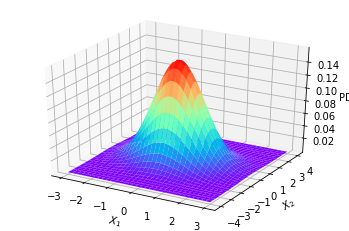

In [12]:
fig = plt.figure()
ax = fig.gca(projection=Axes3D.name)
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=matplotlib.cm.rainbow)
# antialiasing is to make smooth
ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")
ax.set_zlabel("PDF")

plt.show()

<ipython-input-13-08aa829e3bec>:7: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=matplotlib.cm.rainbow) # plot the contours in z direction


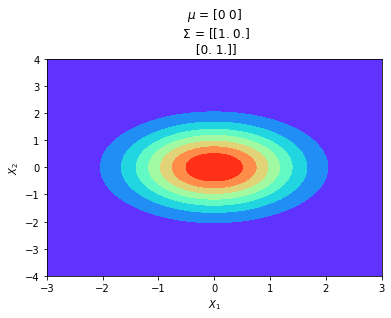

In [13]:
fig = plt.figure()
ax = fig.gca()

ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=matplotlib.cm.rainbow) # plot the contours in z direction
ax.set_title(f'$\mu$ = {mean}\n $\Sigma$ = {sigma}')
plt.show()

In [14]:
def task1(mu, sig, N):
  # mu = 0
  # sig = 0
  # N = 100


  X = jnp.linspace(-4, 4, N) # generate N evenly placed values of X from -4 to 4
  Y = jnp.linspace(-4, 4, N) # generate N evenly placed values of Y from -4 to 4

  X, Y = jnp.meshgrid(X, Y)  # get the meshgrid

  # generate the mean vector and covariance matrix from the slider input values
  mean = jnp.array([mu, mu]) 
  print(mean)
  sigma = jnp.array([[ 1. , sig], [sig,  1]])
  print(sigma)
  # Pack X and Y into a single 3-dimensional array 
  # pos is an array constructed by packing the meshed arrays of variables
  # x_1, x_2, x_3, ..., x_k into its _last_ dimension.
  pos = jnp.empty(X.shape + (2,))
  # print(X.shape)
  # print(pos)
  pos = pos.at[:, :, 0].set(X)
  pos = pos.at[:, :, 1].set(Y)
  print('-------')
  # print(pos)


  # The distribution on the variables X, Y packed into pos.
  Z = jax.scipy.stats.multivariate_normal.pdf(pos, mean, sigma)
  # print(Z)


  fig = plt.figure()
  ax = fig.gca(projection=Axes3D.name)
  ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=matplotlib.cm.rainbow)
  # antialiasing is to make smooth
  ax.set_xlabel(r"$X_1$")
  ax.set_ylabel(r"$X_2$")
  ax.set_zlabel("PDF")

  plt.show()

  fig2 = plt.figure()
  ax = fig2.gca()
  ax.set_xlabel(r"$X_1$")
  ax.set_ylabel(r"$X_2$")

  cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=matplotlib.cm.rainbow) # plot the contours in z direction
  ax.set_title(f'$\mu$ = {mean}\n $\Sigma$ = {sigma}')

  plt.show()

In [15]:
interactive(task1 ,mu=(-4,4,0.5),sig=(-3,3,0.3), N=(30,200, 5))

interactive(children=(FloatSlider(value=0.0, description='mu', max=4.0, min=-4.0, step=0.5), FloatSlider(value…